Using TensorFlow backend.


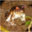

[6]


<Figure size 1500x500 with 1 Axes>

(50000, 3072)
(10000, 3072)
(10000, 3072)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 16)                1040      
_________________________________________________________________
output (Dense)               (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [2]:
# -*- coding: utf-8 -*-
"""Jagmohan.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1lcSMwi7tRoEEBWoLvgltmni9-A0HGs3j
"""

from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
from IPython.display import display
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import TensorBoard
from time import strftime

"""Get the data"""

(x_train,y_train),(x_test,y_test)  =  cifar10.load_data()

for i in range(1):
  pic = array_to_img(x_train[i])
  display(pic)
  print(y_train[i])
  #print(sep =  ' ',end = " ")

plt.figure(figsize=(15,5))
x = 1
plt.title('x={:}'.format(x))

plt.imshow(x_train[7])

plt.show()

plt.figure(figsize=(10,5))

for i in range(10):
  
           plt.subplot(1,10,i+1)
           plt.xticks([])
           plt.yticks([])
           plt.imshow(x_train[i])

label = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

label[y_train[7][0]]

plt.figure(figsize=(15,5))

for i in range(10):
           plt.subplot(1,10,i+1)
           plt.xticks([])
           plt.yticks([])
           plt.xlabel(label[y_train[i][0]],fontsize=15)
           plt.imshow(x_train[i])

x_train.shape

y_train.shape

x_train[0]

y_train[0]

y_train[6]

x_train[0][0][0]

type(x_train[0][0][0][0]/255.0)

x_train =  x_train / 255.0 
x_test =   x_test / 255.0

x_train.shape

x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

print(x_train.shape)

print(x_test.shape)

"""Validation dataset"""

x_val = x_train[:10000]
print(x_val.shape)

y_val = y_train[:10000]

# x_train = x_train[10000:]
# y_train = y_train[10000:]

y_train.shape

"""Modeling"""

model_1 = Sequential([
    Dense(units = 128 , input_dim = 3072 ,activation = 'relu',name="hidden1"),
    Dense(units = 64 , activation = 'relu',name="hidden2"),
    Dense(units = 16 , activation = 'relu',name="hidden3"),
    Dense(units = 10 , activation = 'softmax',name='output')
])
model_1.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

type(model_1)

model_1.summary()



Tensorboard

In [3]:
day_time  = f'Time is {strftime("%H:%M:%S")}' 

In [4]:
day_time

'Time is 01:24:12'

In [5]:
LOG_DIR = 'tensorboard_cifar_logs/'

In [6]:
def get_tensorboard(model_name):
    day_time1  = f'Time and {model_name} is {strftime("%H %M")}' 
    dir_1  = os.path.join(LOG_DIR , day_time1)
    try : 
        os.makedirs(dir_1)
    except OSError as err:
        print(err.strerror)
    else: 
        print("successful")
    return (TensorBoard(log_dir=dir_1))

In [6]:
get_tensorboard("model_1")

successful


Fit the Model

In [31]:
%%time
model_1.fit(x_train, y_train ,epochs = 100,batch_size=1000 ,callbacks=[get_tensorboard('Model 1')],verbose = 0 , validation_data=(x_val, y_val))

successful
Wall time: 6min 13s


In [8]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(3072,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 3072)              0         
_________________________________________________________________
m2_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m2_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m2_hidden3 (Dense)           (None, 15)                975       
_________________________________________________________________
m2_output (Dense)            (None, 10)                160       
Total params: 402,735
Trainable params: 402,735
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(3072,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(15, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 3072)              0         
_________________________________________________________________
m3_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
m3_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m3_hidden3 (Dense)           (None, 15)                975       
_________________________________________________________________
m3_output (Dense)            (None, 10)                160       
Total params: 402,735
Trainable params: 402,735
Non-trainable params: 0
_________________________________________________________________


In [9]:
%%time
model_2.fit(x_train, y_train ,epochs = 100,batch_size=1000 ,callbacks=[get_tensorboard('Model 2')],verbose = 0 , validation_data=(x_val, y_val))

successful
Instructions for updating:
Use tf.cast instead.
Wall time: 8min 48s


In [11]:
%%time
model_3.fit(x_train, y_train ,epochs = 100,batch_size=1000 ,callbacks=[get_tensorboard('Model 3')],verbose = 0 , validation_data=(x_val, y_val))

successful
Wall time: 8min 55s


Prediction

In [9]:
x_val

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.27843137, 0.30196078, 0.17254902, ..., 0.32941176, 0.30196078,
        0.26666667],
       [0.98039216, 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99607843],
       [0.24313725, 0.21568627, 0.02745098, ..., 0.65490196, 0.77647059,
        0.51372549]])

In [10]:
type(x_val)

numpy.ndarray

In [11]:
x_val.shape

(10000, 3072)

In [12]:
x_val[0].shape

(3072,)

In [13]:
test_val = np.expand_dims(x_val[0],axis=0)

In [14]:
test_val.shape

(1, 3072)

In [15]:
model_2.predict(test_val)

array([[3.54961166e-03, 1.80275494e-03, 2.48908494e-02, 1.16623394e-01,
        2.31373869e-02, 6.88245371e-02, 7.45992959e-01, 1.25816576e-02,
        1.39325959e-04, 2.45756609e-03]], dtype=float32)

In [16]:
np.set_printoptions(precision=3)

In [17]:
model_2.predict(test_val).shape

(1, 10)

In [18]:
model_2.predict(x_val).shape

(10000, 10)

In [19]:
model_2.predict_classes(test_val)


array([6], dtype=int64)

In [11]:
count = 0 

In [12]:
for i in range(20):
    img_i = np.expand_dims(x_val[i], axis= 0)
    t1 = model_2.predict_classes(img_i)[0]
    print(f'Actual :{y_val[i][0]} vs predict : {t1}')
    if(y_val[i][0] == t1):
#         print(count+1)
        count = count+1
    

Actual :6 vs predict : 6
Actual :9 vs predict : 1
Actual :9 vs predict : 9
Actual :4 vs predict : 4
Actual :1 vs predict : 1
Actual :1 vs predict : 1
Actual :2 vs predict : 6
Actual :7 vs predict : 7
Actual :8 vs predict : 8
Actual :3 vs predict : 2
Actual :4 vs predict : 4
Actual :7 vs predict : 5
Actual :7 vs predict : 7
Actual :2 vs predict : 7
Actual :9 vs predict : 6
Actual :9 vs predict : 8
Actual :9 vs predict : 0
Actual :3 vs predict : 8
Actual :2 vs predict : 6
Actual :6 vs predict : 6


In [22]:
print(count)

5518


Evaluation

In [23]:
model_2.metrics_names 

['loss', 'acc']

In [24]:
model_2.evaluate(x_val,y_val)

10000/10000 [==============================] - 1s 105us/step


[1.2464293544769287, 0.5518]

In [25]:
model_2.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 115us/step


[1.4107258918762207, 0.4957]

Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
conf_m = confusion_matrix(y_test , model_2.predict_classes(x_test))

In [28]:
conf_m

array([[539,  43,  57,  10,  27,  13,  41,  23, 206,  41],
       [ 36, 654,   5,  18,   8,  14,  25,  15,  90, 135],
       [ 88,  24, 321,  61, 143,  61, 209,  33,  37,  23],
       [ 26,  33,  85, 242,  50, 179, 258,  31,  44,  52],
       [ 64,  17, 115,  34, 404,  35, 236,  48,  38,   9],
       [ 22,  21,  84, 144,  63, 359, 192,  48,  36,  31],
       [ 11,  12,  46,  35,  72,  28, 746,   9,  18,  23],
       [ 56,  17,  56,  44, 119,  83,  81, 459,  23,  62],
       [ 78,  88,  11,  17,  21,  14,  22,   6, 694,  49],
       [ 42, 201,  10,  28,  11,  10,  34,  25, 100, 539]], dtype=int64)

In [35]:
conf_m.max()

746

In [36]:
import itertools

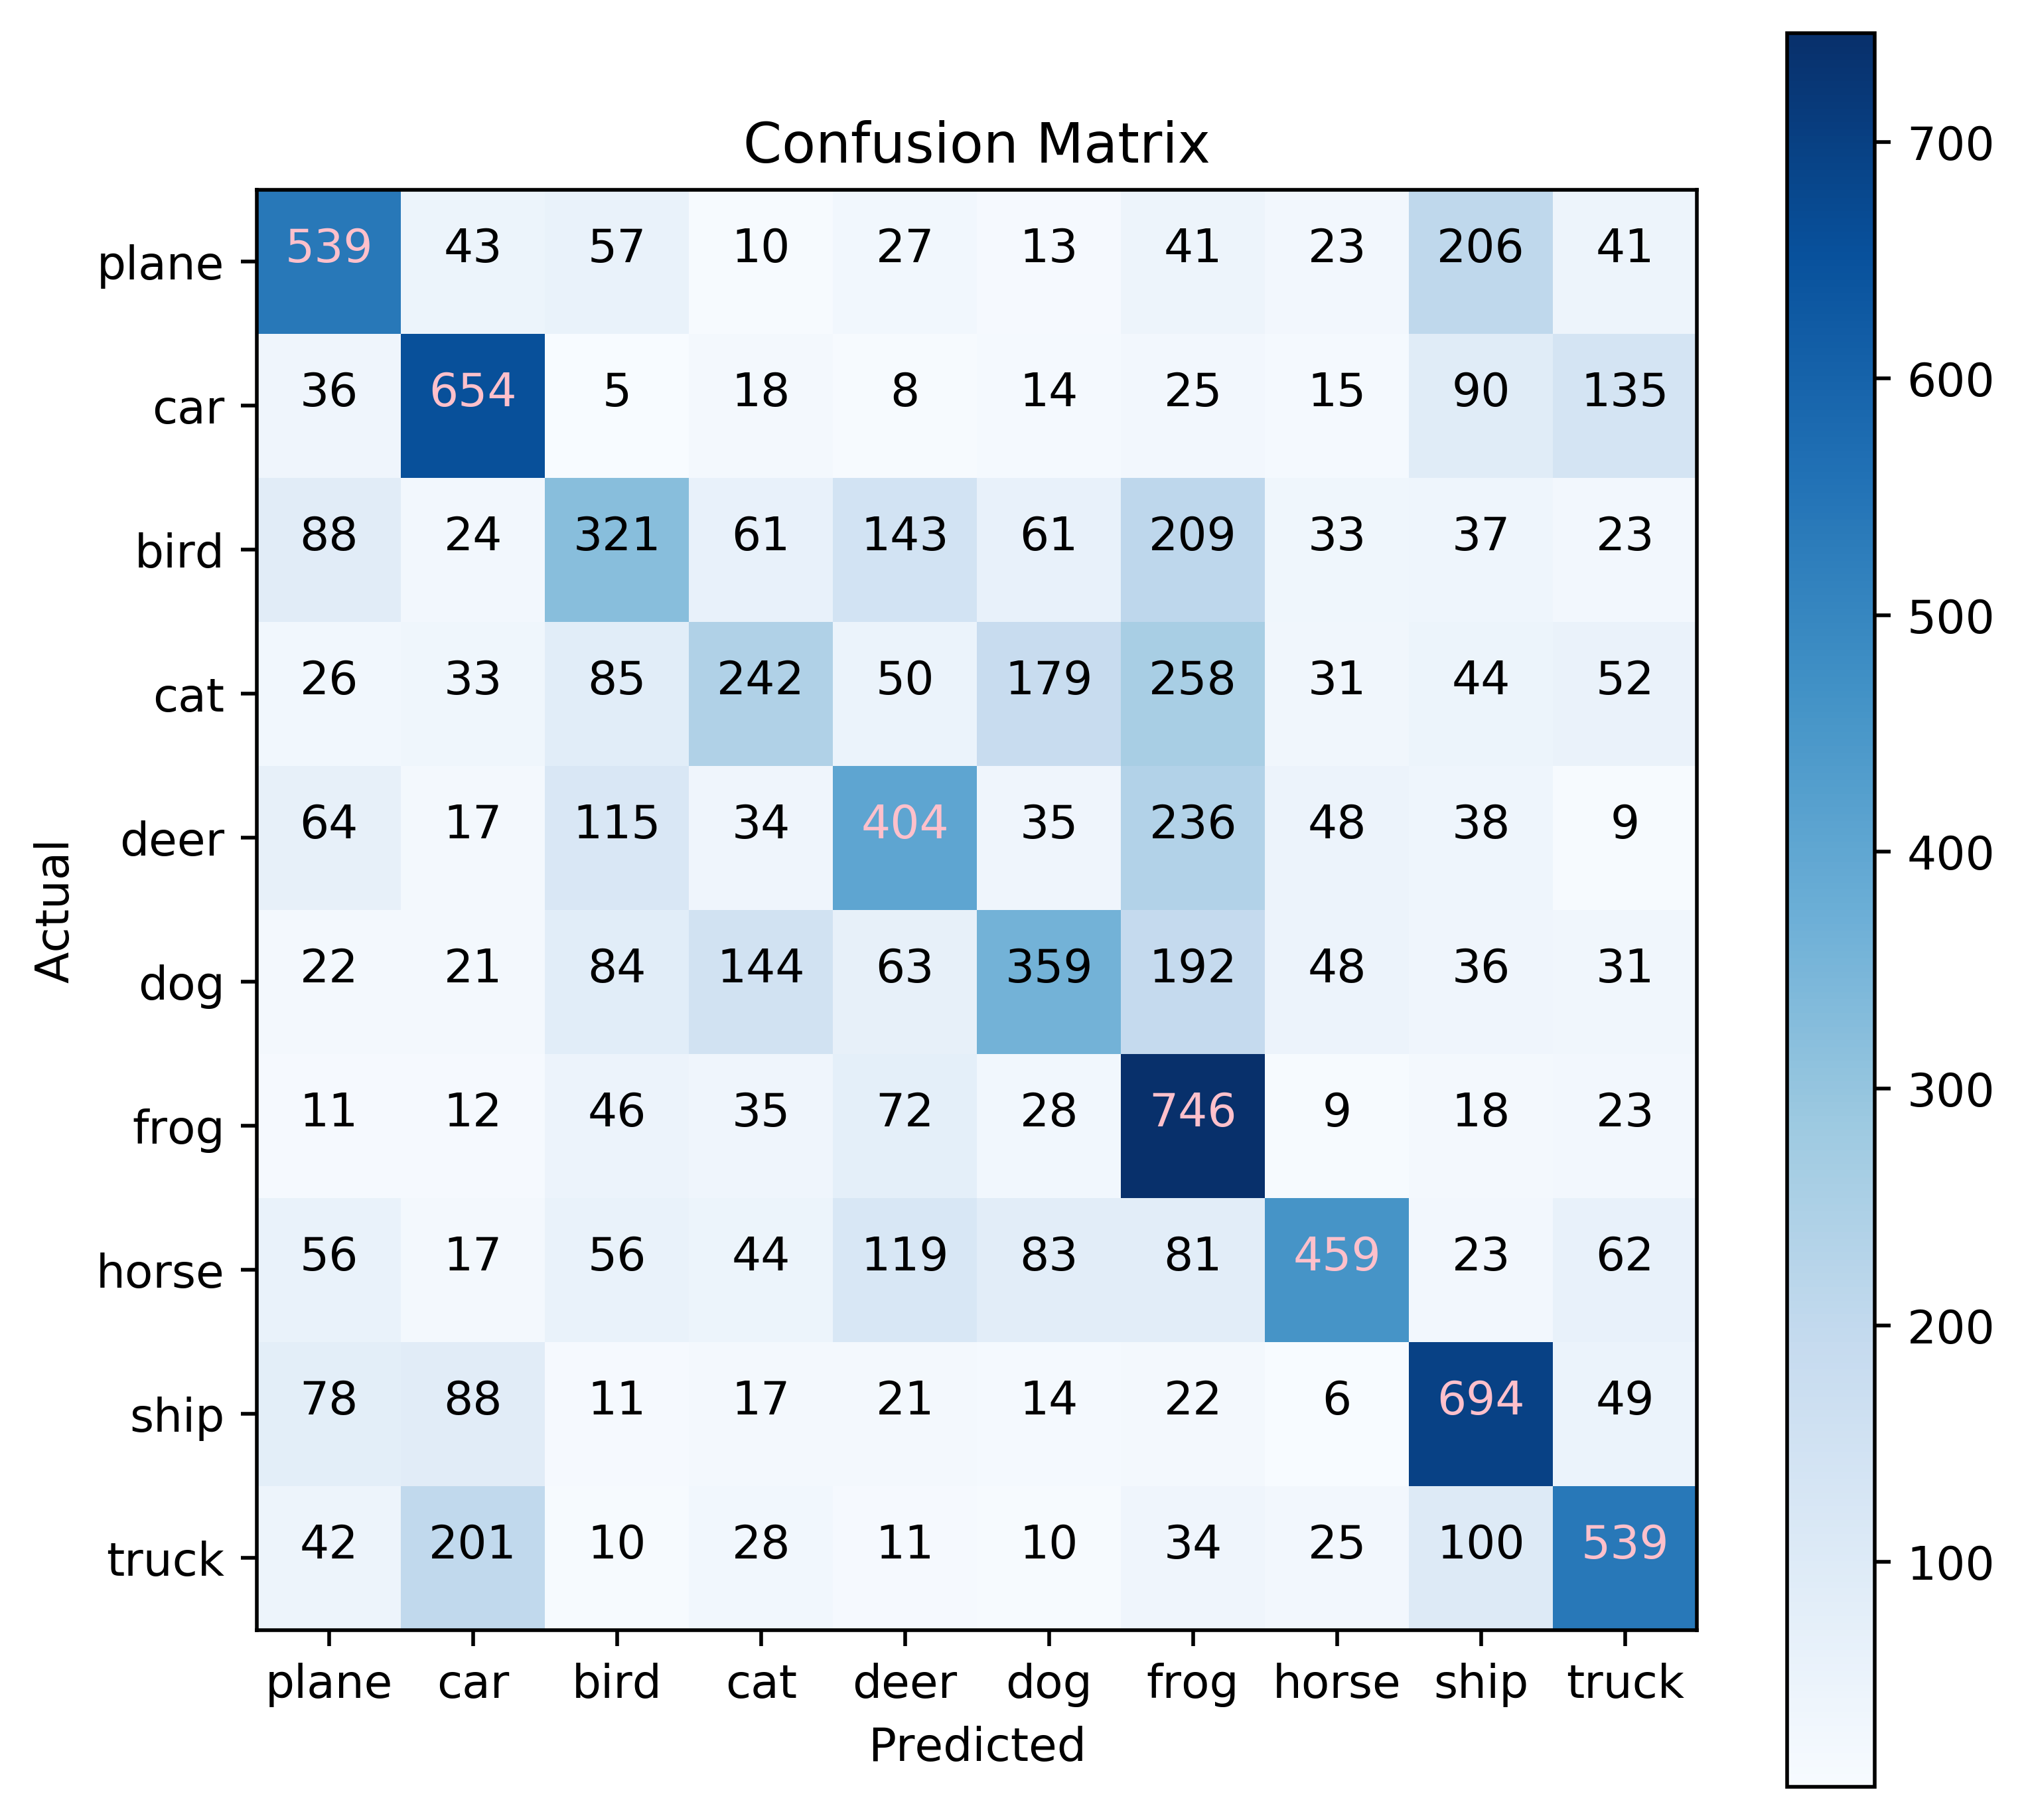

In [46]:
plt.figure(figsize = (7,7),dpi = 500)
plt.imshow(conf_m,cmap=plt.cm.Blues)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
a=[0,9] 
plt.yticks(np.arange(10),label)
plt.xticks(np.arange(10),label)
plt.colorbar()

for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_m[i, j], horizontalalignment='center',color='pink' if conf_m[i, j] > conf_m.max()/2 else 'black')
    
plt.show()

In [47]:
np.diag(conf_m)

array([539, 654, 321, 242, 404, 359, 746, 459, 694, 539], dtype=int64)

In [49]:
recall = np.diag(conf_m) / np.sum(conf_m, axis=1)

In [50]:
recall

array([0.539, 0.654, 0.321, 0.242, 0.404, 0.359, 0.746, 0.459, 0.694,
       0.539])

In [51]:
precision = np.diag(conf_m) / np.sum(conf_m, axis=0)

In [52]:
precision

array([0.56 , 0.589, 0.406, 0.382, 0.44 , 0.451, 0.405, 0.659, 0.54 ,
       0.559])

In [62]:
avg_recall = np.mean(recall)
print(f'{avg_recall:%}')

49.570000%


In [63]:
avg_precision = np.mean(precision)
print(f'{avg_precision:%}')

49.910864%


In [64]:
score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)

In [59]:
print(f'{score:%}')

49.739848%
